## <font color='FFA500'> **Forecasting Supermarket Grocery Sales Using Facebook Prophet**</font>



#### Facebook Prophet is an open-source forecasting tool developed by Meta. It is designed for time series data with **seasonality**, **trend shifts**, and **holiday effects**, making it ideal for business use cases like sales and demand forecasting.

---

### <font color='367588'>**Why Use Prophet?**</font>

* Handles **missing data** and **outliers**
* Automatically detects **trends** and **seasonal patterns**
* Supports **holiday effects**
* Easy to use and **interpretable**
* Scales well for **multiple time series**

---

### <font color='367588'>**How It Works**</font>

Prophet models time series using this additive formula:

$$
y(t) = \text{Trend} + \text{Seasonality} + \text{Holidays} + \text{Error}
$$

It supports both **linear** and **logistic trends**, and allows **custom seasonality** if needed.

---


## <font color='367588'>**Overview**</font>

The notebook focuses on forecasting **daily grocery sales** for a supermarket over time.  
The dataset contains records of **sales and corresponding profit** from **2015 to 2019**.


# <font color='367588'>Step1- Importing libraries</font>

In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math 
import numpy as np


# <font color='367588'>Step2 - Dataset loading and Preparation</font>

In [2]:
df = pd.read_csv('I:/CQAI/TSA/TSD/TSD/data/Supermart Grocery Sales - Retail Analytics Dataset.csv',usecols=["Order Date","Sales","Profit"], header=0)

In [3]:
df.isnull().sum()


Order Date    0
Sales         0
Profit        0
dtype: int64

In [4]:
df = df.rename(columns = {'Order Date': 'ds','Sales': 'y'})



df["ds"] = pd.to_datetime(df["ds"],format='mixed')
groc_sales =df.sort_values(by=["ds"])

groc_sales.head()

,ds,y,Profit
3323,2015-01-03,864,380.16
739,2015-01-04,2033,325.28
740,2015-01-04,698,223.36
741,2015-01-04,759,174.57
3872,2015-01-05,878,149.26


In [5]:
groc_sales=groc_sales.drop_duplicates(subset="ds")



In [6]:

groc_sales=groc_sales.reset_index(drop=True)


In [7]:
print(groc_sales.iloc[305:595])

            ds     y  Profit
305 2016-01-02  2493  573.39
306 2016-01-03  1376  522.88
307 2016-01-04  1449  333.27
308 2016-01-05   508   76.20
309 2016-01-06  1820  782.60
..         ...   ...     ...
590 2016-12-27  1691  388.93
591 2016-12-28   785  243.35
592 2016-12-29   961  345.96
593 2016-12-30   699   90.87
594 2016-12-31  2157  474.54

[290 rows x 3 columns]


In [8]:
groc_sales.duplicated().sum()


0

In [9]:
groc_sales.shape

(1236, 3)

# <font color='367588'>Step3 - Plotting and analysing data points</font>

<Axes: xlabel='ds'>

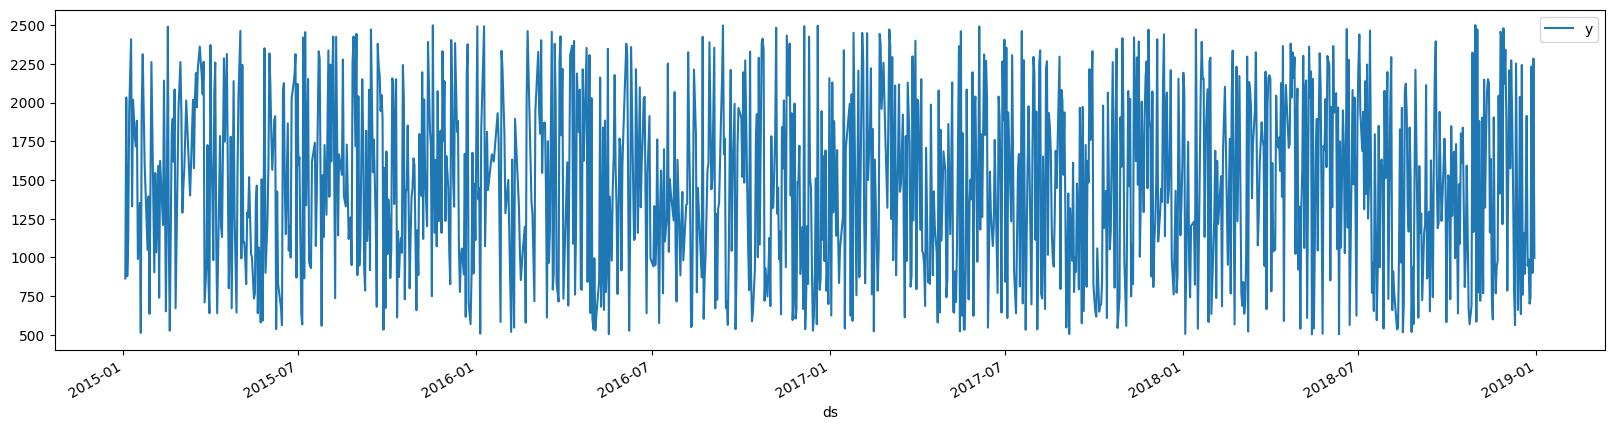

In [10]:

groc_sales.plot(x='ds',y='y',figsize=(20,5))

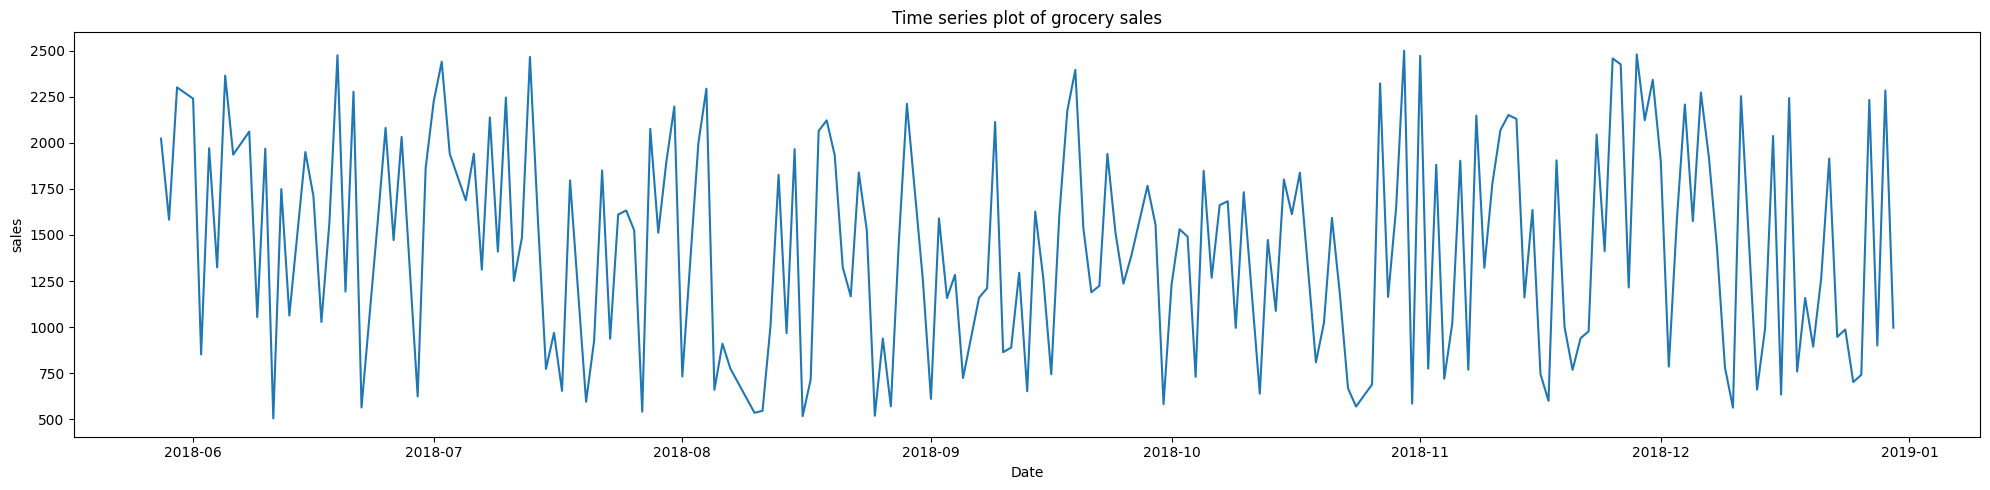

In [14]:
import seaborn as sns

plt.figure(figsize=(20, 5))



plt.plot(groc_sales["ds"].tail(200), groc_sales["y"].tail(200),)
plt.title(f"Time series plot of grocery sales")
plt.xlabel("Date")
plt.ylabel("sales")  
plt.tight_layout()

plt.show()

### Seasonal Decomposition to analyze Trend and Seasonlaity

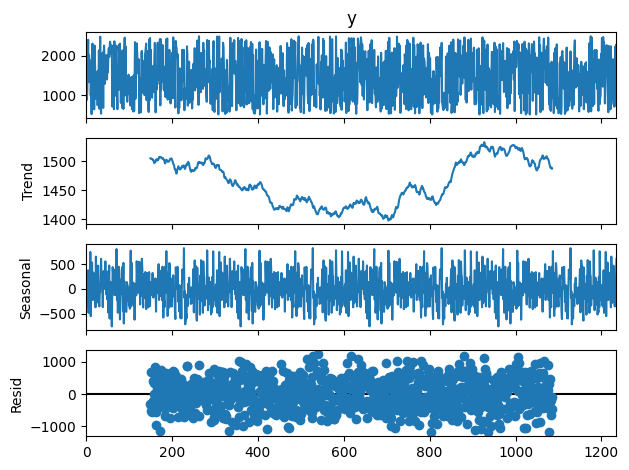

<Axes: >

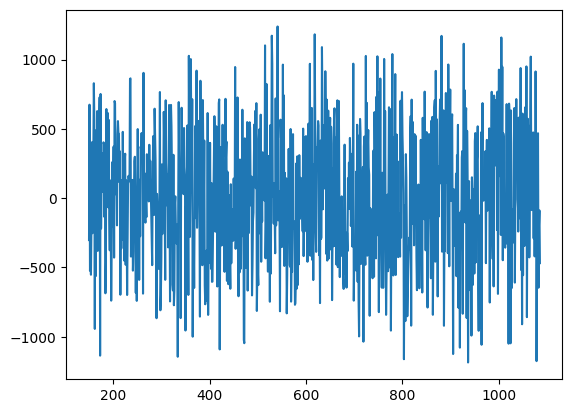

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

res= seasonal_decompose(groc_sales["y"].dropna(), model="additive", period=300)
res.plot()
plt.show()
res.resid.plot()  

# <font color='367588'>Step4 - Train / Test split </font>

In [12]:
train = groc_sales.iloc[:-150]
test = groc_sales.iloc[-150:]

# <font color='367588'>Step5 - Modeling</font>

In [14]:
m = Prophet()

m.add_regressor("Profit")


m.fit(train)

     

16:50:43 - cmdstanpy - INFO - Chain [1] start processing
16:50:43 - cmdstanpy - INFO - Chain [1] done processing


# <font color='367588'>Step6 - Make Future Predictions</font>

In [15]:
future = m.make_future_dataframe(periods=150, freq='D') 
future = pd.concat([future, groc_sales.iloc[:, -1:]], axis = 1)

forecast = m.predict(future)

In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-150:]

,ds,yhat,yhat_lower,yhat_upper
1086,2018-07-24,1071.949815,496.997468,1681.719495
1087,2018-07-25,1981.472473,1425.276393,2534.658759
1088,2018-07-26,1161.112842,563.374886,1723.003795
1089,2018-07-27,845.224947,272.928750,1380.084360
1090,2018-07-28,2175.722300,1640.317020,2721.998965
...,...,...,...,...
1231,2018-12-16,1256.040185,704.810679,1811.339167
1232,2018-12-17,2152.991117,1598.704995,2715.232044
1233,2018-12-18,1207.028503,677.870623,1787.738389
1234,2018-12-19,1498.112389,949.918018,2049.403703


In [17]:

test

,ds,y,Profit
1086,2018-07-24,1611,128.88
1087,2018-07-25,1633,718.52
1088,2018-07-26,1525,198.25
1089,2018-07-27,541,27.05
1090,2018-07-28,2076,830.40
...,...,...,...
1231,2018-12-26,741,244.53
1232,2018-12-27,2233,870.87
1233,2018-12-28,900,252.00
1234,2018-12-29,2284,433.96


In [ ]:
plot_plotly(m ,forecast)# prophets built in function to plot forecasts

In [19]:
plot_components_plotly(m, forecast)

#  <font color='367588'>Step7 - Plotting Forecasted Sales vs Actual Sales and confidence intervals</font>

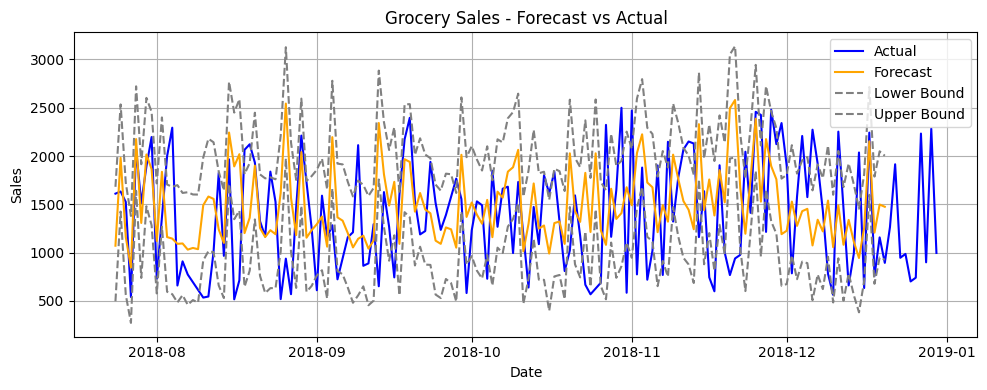

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Plot actual values
plt.plot(test["ds"], test["y"], label='Actual', color='blue')

# Plot forecast values
plt.plot(forecast["ds"][-150:], forecast["yhat"][-150:], label='Forecast', color='orange')

# Plot forecast confidence intervals
plt.plot(forecast["ds"][-150:], forecast["yhat_lower"][-150:], label='Lower Bound', color='gray', linestyle='--')
plt.plot(forecast["ds"][-150:], forecast["yhat_upper"][-150:], label='Upper Bound', color='gray', linestyle='--')

# Titles and labels
plt.title("Grocery Sales - Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# <font color='367588'>Step8 - Evaluating Forecasts on Test Set</font>

In [21]:

predictions = forecast.iloc[-150:]['yhat']

In [22]:
test['y'].shape

(150,)

In [23]:
predictions.shape

(150,)

In [ ]:


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['y'], predictions)

print(f"Mean Squared Error : {mse :.2f}")


# Calculate Mean Absolute Error (MAE)
mae = sum(abs(test['y'] -  predictions)) / len(test['y'])
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate R-squared (R²)
r2 = r2_score(test['y'], predictions)
print(f"R-squared Percentage: {r2:.2f}")
 


Mean Squared Error : 192261.26
Mean Absolute Error (MAE): 363.68
R-squared Percentage: 0.42


In [ ]:
print("Mean Value of Test Dataset:", test['y'].mean())
rmse = math.sqrt(mean_squared_error(test['y'],  predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Value of Test Dataset: 1393.54
Root Mean Squared Error (RMSE): 438.48
